In [155]:
!pip install scipy

  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)
You should consider upgrading via the '/Users/mattzidell/Documents/GitHub/DSC_209/venv/bin/python3 -m pip install --upgrade pip' command.


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [75]:
#inflation annual percentage
df_cpi = pd.read_csv("WB CPI/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_23195.csv",skiprows=2,header = 1)

#inequality gini index
df_gini = pd.read_csv("WB Gini Index/API_SI.POV.GINI_DS2_en_csv_v2_25089.csv",skiprows=2,header = 1)

#net migration
df_mig = pd.read_csv("WB Net Migration/API_SM.POP.NETM_DS2_en_csv_v2_97.csv",skiprows=2,header = 1)

#poverty headcount ratio at $3 a day (% of population)
df_pov = pd.read_csv("WB Poverty/API_SI.POV.DDAY_DS2_en_csv_v2_1716.csv",skiprows=2,header = 1)

#GDP
df_gdp = pd.read_csv("WB GDP/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_25118.csv",skiprows=2,header = 1)   

#Homicide rate per 100,000 people
df_hom = pd.read_csv("WB Homicide Rate/API_VC.IHR.PSRC.P5_DS2_en_csv_v2_6913.csv",skiprows=2,header = 1)  

#social metrics
df_soc = pd.read_csv("WB Social/social-development.csv",skiprows=0,header = 0)

#public metrics
df_pub = pd.read_csv("WB Public/public-sector-raw-2021.csv",skiprows=3,header = 0)   


In [76]:
df_soc_usa = df_soc[df_soc['Country Name'] == 'United States']
df_pub_usa = df_pub[df_pub['Country Name'] == 'United States']  

In [77]:
df_soc_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 145 to 14865
Data columns (total 37 columns):
 #   Column                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                           --------------  -----  
 0   Country Name                                                                                                     61 non-null     object 
 1   Country Code                                                                                                     61 non-null     object 
 2   Year                                                                                                             61 non-null     int64  
 3   average_value_Adolescent fertility rate (births per 1,000 women ages 15-19)                                      60 non-null     float64
 4   average_value_Children in employment, fe

In [78]:
df_soc_usa = df_soc_usa.drop(['Country Name','Country Code'], axis=1).reset_index(drop=True)
df_soc_usa.sort_values(by='Year', inplace=True,ascending=True)
df_soc_usa.reset_index(drop=True, inplace=True)

In [79]:
df_pub_usa = df_pub_usa.transpose().reset_index()
df_pub_usa.rename(columns={'index': 'Year'}, inplace=True)
df_pub_usa = df_pub_usa.drop([0,1,3]).reset_index(drop=True)
df_pub_usa.iloc[0,0] = "Year"
df_pub_usa.columns = df_pub_usa.iloc[0]
df_pub_usa = df_pub_usa.drop(0).reset_index(drop=True)
df_pub_usa = df_pub_usa.iloc[:-1]
df_pub_usa['Year'] = pd.to_numeric(df_pub_usa['Year'], errors='coerce').astype('Int64')
df_pub_usa

,Year,"Intentional homicides (per 100,000 people)","Intentional homicides, male (per 100,000 male)","Intentional homicides, female (per 100,000 female)","Internally displaced persons, total displaced by conflict and violence (number of people)","Internally displaced persons, new displacement associated with disasters (number of cases)","Internally displaced persons, new displacement associated with conflict and violence (number of cases)",Battle-related deaths (number of people),Proportion of seats held by women in national parliaments (%),Arms exports (SIPRI trend indicator values),...,Net lending (+) / net borrowing (-) (% of GDP),Net lending (+) / net borrowing (-) (current LCU),Net investment in nonfinancial assets (% of GDP),Net investment in nonfinancial assets (current LCU),"Net incurrence of liabilities, total (% of GDP)","Net incurrence of liabilities, total (current LCU)","Central government debt, total (% of GDP)","Central government debt, total (current LCU)",Net acquisition of financial assets (% of GDP),Net acquisition of financial assets (current LCU)
0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6001000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6301000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6104000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9351000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12312000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016,5.390755,8.570887,2.277249,NaN,1107000.0,NaN,NaN,19.168591,9868000000.0,...,-3.825058,-717010100000.0,1.32605,248569000000.0,4.707755,882472200000.0,98.816982,18523318000000.0,1.100767,206339600000.0
57,2017,5.316767,8.450629,2.247834,NaN,1686000.0,NaN,NaN,19.354839,12070000000.0,...,-2.762889,-539950800000.0,NaN,NaN,3.247542,634666400000.0,NaN,NaN,0.795821,155527200000.0
58,2018,4.956951,7.757731,2.213828,NaN,1247000.0,NaN,NaN,23.502304,9895000000.0,...,-4.854381,-1000578200000.0,NaN,NaN,6.285736,1295607100000.0,NaN,NaN,1.567015,322991000000.0
59,2019,NaN,NaN,NaN,NaN,916000.0,NaN,NaN,23.433875,10788000000.0,...,-5.306615,-1137378700000.0,NaN,NaN,5.560707,1191838800000.0,NaN,NaN,0.392787,84187000000.0


In [80]:
df_pub_usa = df_pub_usa[['Year','Intentional homicides (per 100,000 people)','Central government debt, total (% of GDP)']]

In [81]:
list_of_data = [df_cpi, df_gini, df_mig, df_pov, df_gdp, df_hom]
list_of_data_names = ['CPI','Gini','Migration','Poverty','GDP', 'Homicide Rate']
list_of_us_data = []

In [82]:
for df in list_of_data:
    df = df[df['Country Name'] == 'United States']
    df = df.T
    df.drop(df.index[0:4], inplace=True)
    df = df.rename_axis('Year').reset_index()
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
    list_of_us_data.append(df)
for i in range(len(list_of_us_data)):
    list_of_us_data[i].rename(columns={list_of_us_data[i].columns[1]:list_of_data_names[i]}, inplace=True)
    print(list_of_us_data[i].head(5))


   Year       CPI
0  1960  1.457976
1  1961  1.070724
2  1962  1.198773
3  1963  1.239669
4  1964  1.278912
   Year  Gini
0  1960   NaN
1  1961   NaN
2  1962   NaN
3  1963  36.7
4  1964  37.4
   Year Migration
0  1960  422708.0
1  1961  580333.0
2  1962  625617.0
3  1963  639495.0
4  1964  618635.0
   Year Poverty
0  1960     NaN
1  1961     NaN
2  1962     NaN
3  1963     1.5
4  1964     1.5
   Year                  GDP
0  1960  542390475099.325989
1  1961  562640778342.418945
2  1962  604729643906.495972
3  1963  638380883119.282959
4  1964  685631590686.500977
   Year Homicide Rate
0  1960           NaN
1  1961           NaN
2  1962           NaN
3  1963           NaN
4  1964           NaN


In [83]:
list_of_us_data[0].rename(columns={list_of_us_data[0].columns[1]:'CPI'}, inplace=True)
df_usa = pd.merge(list_of_us_data[0], list_of_us_data[1], on='Year', how='outer')
df_usa = pd.merge(df_usa, list_of_us_data[2], on='Year', how='outer')
df_usa = pd.merge(df_usa, list_of_us_data[3], on='Year', how='outer')
df_usa = pd.merge(df_usa, list_of_us_data[4], on='Year', how='outer')
df_usa = pd.merge(df_usa, list_of_us_data[5], on='Year', how='outer')
df_usa = pd.merge(df_usa, df_pub_usa, on='Year', how='outer')
df_usa = pd.merge(df_usa, df_soc_usa, on='Year', how='outer')

df_usa.drop(65, axis = 0, inplace=True)
df_usa

,Year,CPI,Gini,Migration,Poverty,GDP,Homicide Rate,"Intentional homicides (per 100,000 people)","Central government debt, total (% of GDP)","average_value_Adolescent fertility rate (births per 1,000 women ages 15-19)",...,average_value_Refugee population by country or territory of asylum,average_value_Refugee population by country or territory of origin,"average_value_School enrollment, primary (gross), gender parity index (GPI)","average_value_School enrollment, primary and secondary (gross), gender parity index (GPI)","average_value_School enrollment, secondary (gross), gender parity index (GPI)","average_value_School enrollment, tertiary (gross), gender parity index (GPI)","average_value_Unemployment, female (% of female labor force) (modeled ILO estimate)","average_value_Unemployment, male (% of male labor force) (modeled ILO estimate)","average_value_Vulnerable employment, female (% of female employment) (modeled ILO estimate)","average_value_Vulnerable employment, male (% of male employment) (modeled ILO estimate)"
0,1960,1.457976,NaN,422708.0,NaN,542390475099.325989,NaN,NaN,NaN,81.7410,...,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,1.070724,NaN,580333.0,NaN,562640778342.418945,NaN,NaN,NaN,79.1850,...,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,1.198773,NaN,625617.0,NaN,604729643906.495972,NaN,NaN,NaN,76.6290,...,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,1.239669,36.7,639495.0,1.5,638380883119.282959,NaN,NaN,NaN,74.6802,...,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,1.278912,37.4,618635.0,1.5,685631590686.500977,NaN,NaN,NaN,72.7314,...,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020,1.233584,40.0,329769.0,0.5,21354105000000.0,6.354656,NaN,NaN,NaN,...,340881.0,369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,2021,4.697859,39.7,674787.0,0.5,23681171000000.0,6.779722,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,2022,8.0028,41.7,1319009.0,1.2,26006893000000.0,6.512674,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2023,4.116338,41.8,1322668.0,1.2,27720709000000.0,5.763408,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_usa.columns

Index(['Year', 'CPI', 'Gini', 'Migration', 'Poverty', 'GDP', 'Homicide Rate',
       'Intentional homicides (per 100,000 people)',
       'Central government debt, total (% of GDP)',
       'average_value_Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'average_value_Children in employment, female (% of female children ages 7-14)',
       'average_value_Children in employment, male (% of male children ages 7-14)',
       'average_value_Children in employment, study and work (% of children in employment, ages 7-14)',
       'average_value_Children in employment, study and work, female (% of female children in employment, ages 7-14)',
       'average_value_Children in employment, study and work, male (% of male children in employment, ages 7-14)',
       'average_value_Children in employment, total (% of children ages 7-14)',
       'average_value_Children in employment, work only (% of children in employment, ages 7-14)',
       'average_value_Children in employme

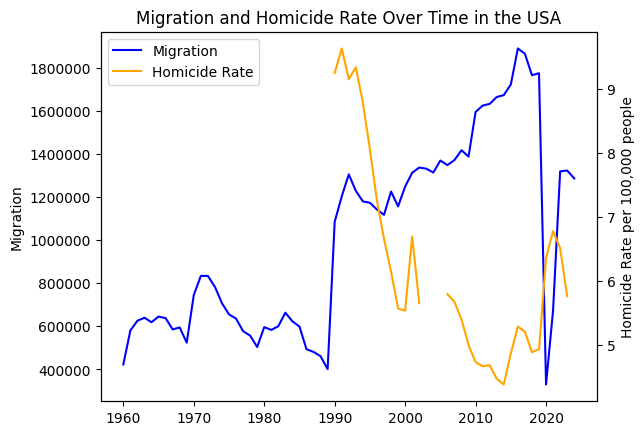

In [144]:
#truthful number 1
fig,ax1 = plt.subplots()
l1,= ax1.plot(df_usa['Year'], df_usa['Migration'],color='blue')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylabel('Migration')
ax2 = ax1.twinx()
ax2.set_ylabel('Homicide Rate per 100,000 people')
l2,= ax2.plot(df_usa['Year'], df_usa['Homicide Rate'], color='orange')
ax1.legend([l1,l2],['Migration','Homicide Rate'])
plt.title('Migration and Homicide Rate Over Time in the USA')
plt.show()


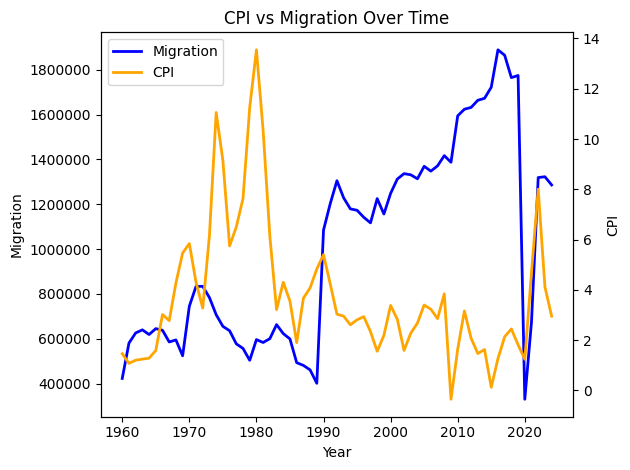

In [203]:
#truthful number 2

fig, ax1 = plt.subplots()

# Left axis (CPI)
ax1.plot(df_usa['Year'], df_usa['Migration'], color='blue', label='Migration', linewidth=2)
ax1.set_ylabel('Migration')
ax1.tick_params(axis='y')
ax1.ticklabel_format(style='plain', axis='y')  # no scientific notation

# Right axis (Migration)
ax2 = ax1.twinx()
ax2.plot(df_usa['Year'], df_usa['CPI'], color='orange', label='CPI', linewidth=2)
ax2.set_ylabel('CPI')
ax2.tick_params(axis='y')
ax2.ticklabel_format(style='plain', axis='y')

# Shared X-axis
ax1.set_xlabel('Year')
plt.title('CPI vs Migration Over Time')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

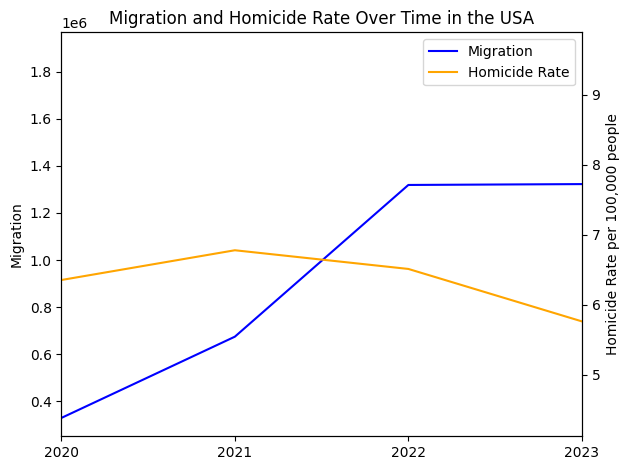

In [173]:
#deceptive number 1
fig,ax1 = plt.subplots()
l1,= ax1.plot(df_usa['Year'], df_usa['Migration'],color='blue')
#ax1.ticklabel_format(style='plain', axis='y')
ax1.set_ylabel('Migration')
ax2 = ax1.twinx()
ax2.set_ylabel('Homicide Rate per 100,000 people')
l2,= ax2.plot(df_usa['Year'], df_usa['Homicide Rate'], color='orange')
ax1.legend([l1,l2],['Migration','Homicide Rate'])
plt.xlim(2020 ,2023) # Set x-axisplt.title('Migration and Homicide Rate Over Time in the USA')
plt.xticks(np.arange(2020, 2024, 1)) 

plt.title('Migration and Homicide Rate Over Time in the USA')
plt.tight_layout()
plt.show()

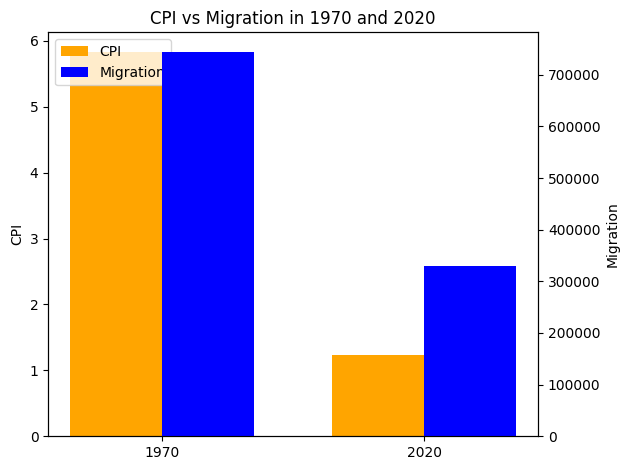

In [205]:
subset = df_usa[df_usa['Year'].isin([1970, 2020])]
x = 2
bar_width = 0.4

#misleading number 2

# Filter data
subset = df_usa[df_usa['Year'].isin([1970, 2020])]

# x positions for each year
x = np.arange(len(subset))  # [0, 1]
bar_width = 0.35

fig, ax1 = plt.subplots()

# Left axis (CPI)
b1 = ax1.bar(x - bar_width/2, subset['CPI'], width=bar_width, color='orange', label='CPI')
ax1.set_ylabel('CPI')
ax1.tick_params(axis='y')
ax1.ticklabel_format(style='plain', axis='y')  # disable sci notation

# Right axis (Migration)
ax2 = ax1.twinx()
b2 = ax2.bar(x + bar_width/2, subset['Migration'], width=bar_width, color='blue', label='Migration')
ax2.set_ylabel('Migration')
ax2.tick_params(axis='y')
ax2.ticklabel_format(style='plain', axis='y')

# X-axis labels
plt.xticks(x, subset['Year'])
plt.xlabel('Year')

# Combine legends from both axes
bars = b1 + b2
labels = [b.get_label() for b in bars]

# Combine legends properly from both axes
ax1.legend(
    [b1, b2],                # use the bar containers themselves
    ['CPI', 'Migration'],    # custom labels
    loc='upper left'
)

plt.title('CPI vs Migration in 1970 and 2020')
plt.tight_layout()
plt.show()
